# Assesment Problems

In [59]:
# Import Libraries 
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind 
from scipy.stats import f_oneway
# Random seed for reproducibility
np.random.seed(50)

## Problem 1: Extending the Lady Tasting Tea

This experiment extends Fisher’s [*Lady Tasting Tea*](https://en.wikipedia.org/wiki/Lady_tasting_tea) design to compare the probability of perfectly identifying all cups in an 8-cup versus a 12-cup setup.
We will use both analytical calculation (`math.comb`) and a Monte Carlo simulation (`numpy`) to estimate these probabilities.

In [60]:
# Define experiment parameters

# Original experiment (8 cups: 4 milk-first, 4 tea-first)
no_cups_orig = 8
no_cups_milk_first_orig = 4
no_cups_tea_first_orig = 4

# Extended experiment (12 cups: 4 milk-first, 8 tea-first)
no_cups_ext = 12
no_cups_milk_first_ext = 4
no_cups_tea_first_ext = 8        

In [61]:
# Number of ways of selecting 4 milk-first cups from 8 total cups.
ways_orig = math.comb(no_cups_orig, no_cups_milk_first_orig)
# Number of ways of selecting 4 milk-first cups from 12 total cups.
ways_ext = math.comb(no_cups_ext, no_cups_milk_first_ext)

# Show results
ways_orig, ways_ext

(70, 495)

- [math.comb – combinations in Python (GeeksforGeeks)](https://www.geeksforgeeks.org/python/python-math-comb-method/) — used to calculate the number of possible cup arrangements.

In [62]:
# Calculate exact probabilities.
prob_orig_exact = 1 / ways_orig
prob_ext_exact  = 1 / ways_ext

print(f"Original experiment exact probability:  {prob_orig_exact}")
print(f"Extended experiment exact probability:  {prob_ext_exact}")

Original experiment exact probability:  0.014285714285714285
Extended experiment exact probability:  0.00202020202020202


In [63]:
# Monte Carlo simulation of random guesses 

# Number of random guesses (10,000 gives stable results with minimal runtime)
n_shuffles = 10_000 

# --- Original experiment (8 cups) ---
# Counter to record how many times all cups are guessed correctly
hits_orig = 0

# Repeat the experiment n_shuffles times
for _ in range(n_shuffles):
    # Randomly select 4 cups (from 0–7) to represent the participant's guess
    guess = np.random.choice(no_cups_orig, size=no_cups_milk_first_orig, replace=False)
    
    # Assume the true milk-first cups are {0, 1, 2, 3}.
    # Compare the guessed cups with the true cups as sets.
    if set(guess) == set(range(no_cups_milk_first_orig)):
        # If the guess matches exactly, count it as one.
        hits_orig += 1

# Calculate the simulated probability of a perfect guess
prob_orig_sim = hits_orig / n_shuffles


# --- Extended experiment (12 cups) ---
# Counter to record how many times all cups are guessed correctly
hits_ext = 0

# Repeat the experiment n_shuffles times
for _ in range(n_shuffles):
    # Randomly select 4 cups (from 0–11) to represent a random guess of which cups are milk-first
    guess = np.random.choice(no_cups_ext, size=no_cups_milk_first_ext, replace=False)
    
    # Assume the true milk-first cups are {0, 1, 2, 3}.
    # Compare the guessed cups with the true cups as sets.
    if set(guess) == set(range(no_cups_milk_first_ext)):
        # If the guess matches exactly, count it as one.
        hits_ext += 1

# Calculate the simulated probability of a perfect guess
prob_ext_sim = hits_ext / n_shuffles


# --- Display the results ---
print(f"Shuffles: {n_shuffles:,}")
print(f"Original  — exact probability: {prob_orig_exact:.6f}, simulated probability: {prob_orig_sim:.6f}")
print(f"Extended  — exact probability: {prob_ext_exact:.6f}, simulated probability: {prob_ext_sim:.6f}")

Shuffles: 10,000
Original  — exact probability: 0.014286, simulated probability: 0.015100
Extended  — exact probability: 0.002020, simulated probability: 0.002500


- [Monte Carlo Simulation for Sampling in Python (Medium)](https://medium.com/%40kaanalperucan/using-monte-carlo-simulation-for-sampling-in-python-with-examples-7a9600dfb73e) — demonstrates repeating random sampling to estimate probabilities.
- [Monte Carlo Simulation Tutorial (Towards AI)](https://towardsai.net/p/editorial/monte-carlo-simulation-an-in-depth-tutorial-with-python-bcf6eb7856c8) — explains using large numbers of random trials to approximate outcomes.
- [Monte Carlo Simulation with Python (Practical Business Python)](https://pbpython.com/monte-carlo.html) — shows how to run simulation loops similar to the n_shuffles loop.
- [A Guide to Monte Carlo Simulation (Analytics Vidhya)](https://www.analyticsvidhya.com/blog/2021/07/a-guide-to-monte-carlo-simulation/) — explains how to use random experiments to estimate probabilities.
- [NumPy random.choice Documentation (DataCamp)](https://www.datacamp.com/doc/numpy/random-choice) — used here to randomly select cups during each simulated shuffle.



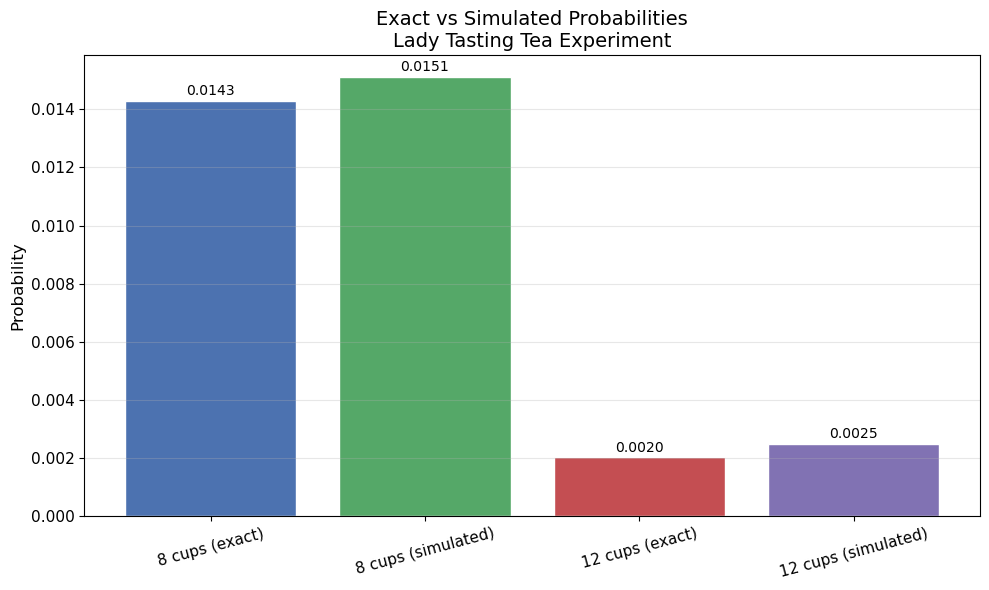

In [64]:
# Bar chart comparison of the exact and simulated probabilities for the Lady Tasting Tea experiment.
labels = ['8 cups (exact)', '8 cups (simulated)',
          '12 cups (exact)', '12 cups (simulated)']

values = [prob_orig_exact, prob_orig_sim, prob_ext_exact, prob_ext_sim]

plt.figure(figsize=(10, 6))

bars = plt.bar(labels, values, 
               color=['#4C72B0', '#55A868', '#C44E52','#8172B3'], 
               edgecolor='white')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height + 0.0001,
             f"{height:.4f}",
             ha='center', va='bottom', fontsize=10)

plt.ylabel('Probability', fontsize=12)
plt.title('Exact vs Simulated Probabilities\nLady Tasting Tea Experiment', fontsize=14)

plt.xticks(rotation=15, fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Interpretation
The simulated probabilities closely match the exact analytical results, confirming that the Monte Carlo approach provides an accurate estimate of the probability of a perfect guess.
For the original 8-cup design, the probability of correctly identifying all cups by chance is approximately 0.0143 (1 in 70).
For the extended 12-cup design, this probability decreases to about 0.0020 (1 in 495), demonstrating that the likelihood of a perfect random guess becomes smaller as the number of cups increases.
This result highlights the increased stringency of the extended design and suggests that limited success would be unlikely by chance alone, without necessarily implying any formal change to the chosen significance threshold.

- [P-Value Explanation (Statistics How To)](https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/p-value/) — clarifies how p-values relate to evidence against the null hypothesis.

### Conclusion
The analytical and simulated results both show that a perfect random guess becomes extremely unlikely as the number of cups increases. This demonstrates how experiment design influences the probability of success by chance.

---

## Problem 2: Normal distribution

Here we generate many samples from a standard normal distribution, N(0, 1), and compare two ways of calculating the standard deviation for each sample.

Population standard deviation (ddof = 0) divides by n and assumes the data represent the entire population. It is slightly biased when used on a sample because small samples tend to underestimate the true spread.

Sample standard deviation (ddof = 1) divides by n – 1 to correct that bias when estimating from a sample. This version gives a better estimate of the true population spread, especially for small sample sizes.

- [Population vs. Sample Standard Deviation (Statology)](https://www.statology.org/population-vs-sample-standard-deviation/) — explains why ddof=0 underestimates spread and why ddof=1 is the unbiased estimator.

In [65]:
# Number of samples
N = 100000
# Size of each sample
n = 10

# Draw N samples of size n from a standard normal distribution, N(0, 1)
# Result is a 2D array with N rows and n columns
samples = np.random.normal(0, 1, (N, n))

# Calculate the standard deviation of each sample
# Population SD
sd_pop = np.std(samples, axis=1, ddof=0)
# Sample SD
sd_smp = np.std(samples, axis=1, ddof=1) 

- [numpy.random.normal (NumPy)](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html) — used to generate N samples from a standard normal distribution.  
- [Normal Distribution in NumPy (GeeksforGeeks)](https://www.geeksforgeeks.org/numpy/normal-distribution-in-numpy/) — explains how NumPy generates normal-distributed random numbers.  
- [numpy.std (NumPy)](https://numpy.org/doc/2.1/reference/generated/numpy.std.html) — documentation for computing standard deviation including ddof options.  
- [numpy.std() in Python (GeeksforGeeks)](https://www.geeksforgeeks.org/python/numpy-std-in-python/) — overview of using `np.std` and its parameters.  
- [How to Compute Standard Deviation in NumPy (Spark By Examples)](https://sparkbyexamples.com/python/python-numpy-standard-deviation-function/) — additional explanation of population vs. sample standard deviation in NumPy.


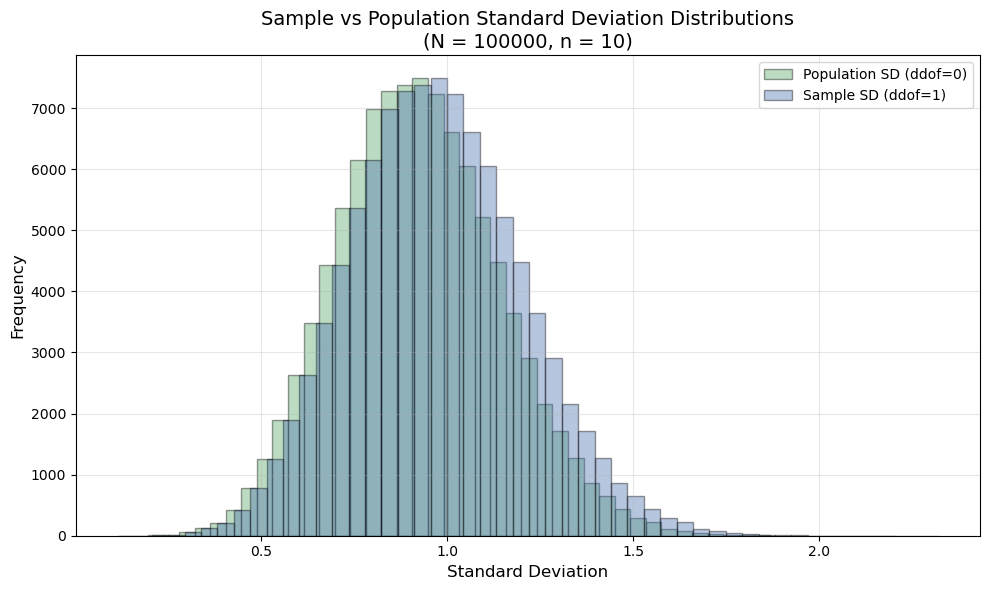

In [66]:
# Plot overlapping histograms to compare population and sample standard deviation distributions
plt.figure(figsize=(10, 6))
plt.hist(sd_pop, bins=50, alpha=0.4, label='Population SD (ddof=0)', edgecolor='black',color='#55A868')
plt.hist(sd_smp, bins=50, alpha=0.4, label='Sample SD (ddof=1)', edgecolor='black',color='#4C72B0')
plt.xlabel('Standard Deviation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Sample vs Population Standard Deviation Distributions\n(N = 100000, n = 10)', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Interpretation
The histogram shows that the sample standard deviations (ddof = 1) are a bit higher on average than the population standard deviations (ddof = 0).
This is because dividing by n – 1 corrects the slight underestimation that occurs when dividing by n in small samples.
Both distributions have a similar shape and overlap a lot, but the sample SD curve is shifted a little to the right.
As the sample size increases, this difference becomes smaller, and both values move closer to 1 — the true standard deviation of N(0, 1).

- [Population vs. Sample Standard Deviations (ThoughtCo)](https://www.thoughtco.com/population-vs-sample-standard-deviations-3126372) — explains the distinction between the two measures.  
- [Bessel’s Correction (Wikipedia)](https://www.wikipedia.org/wiki/Bessel%27s_correction) — describes why dividing by n–1 removes bias.  
- [Population vs. Sample Standard Deviation Review (Khan Academy)](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review) — helpful refresher on both formulas.  
- [Population vs. Sample Standard Deviation (Statology)](https://www.statology.org/population-vs-sample-standard-deviation/) — clear explanation of why ddof=1 is used for samples.


In [67]:
# Compare mean standard deviations for different sample sizes (n)
for n in [3,5, 10, 15, 30, 50, 100]:
    samples = np.random.normal(0, 1, (N, n))  # Generate N samples of size n
    mean_pop = np.mean(np.std(samples, axis=1, ddof=0))  # Mean population SD
    mean_smp = np.mean(np.std(samples, axis=1, ddof=1))  # Mean sample SD
    print(f"n={n:<3} | mean(pop SD)={mean_pop:.4f} | mean(sample SD)={mean_smp:.4f}")

n=3   | mean(pop SD)=0.7220 | mean(sample SD)=0.8843
n=5   | mean(pop SD)=0.8421 | mean(sample SD)=0.9415
n=10  | mean(pop SD)=0.9241 | mean(sample SD)=0.9741
n=15  | mean(pop SD)=0.9491 | mean(sample SD)=0.9824
n=30  | mean(pop SD)=0.9753 | mean(sample SD)=0.9919
n=50  | mean(pop SD)=0.9851 | mean(sample SD)=0.9951
n=100 | mean(pop SD)=0.9923 | mean(sample SD)=0.9973


- [numpy.random.normal (NumPy)](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html) — used to generate N samples from a standard normal distribution for each sample size n.  
- [numpy.std (NumPy)](https://numpy.org/doc/2.1/reference/generated/numpy.std.html) — documentation for computing standard deviation, including ddof=0 and ddof=1.

### Conclusion 
As seen above, the population SD underestimates variability for small samples, but this bias fades as sample size increases. Both SD estimates converge toward 1, the true standard deviation of the standard normal distribution.

---

## Problem 3: t-Tests

In this problem, we use simulation to look at **Type II errors**.
A **Type II error** is when there really is a difference between groups, but our test fails to detect it.
We will
simulate two groups of data:
- Group 1 always has mean 0, SD 1.
- Group 2 has mean d, SD 1, where d goes from 0 to 1 in steps of 0.1.
For each value of d:
  1. Take two samples of size 100.
  2. Run an independent t-test.
  3. Check whether the test fails to reject the null hypothesis.

We repeat this 1,000 times for each d and plot the proportion of times the test fails to detect a difference.  
This shows how the Type II error rate changes as the true difference between the two groups gets bigger.

- [Type II Error Calculator (Statology)](https://www.statology.org/type-ii-error-calculator/) — explains what a Type II error is and how it is calculated.

In [68]:
# Sample size for each group
n = 100

# Number of simulations per mean difference
n_sims = 1000

# Significance level
alpha = 0.05

# Values of d (true difference in means)
d_values = np.arange(0, 1.1, 0.1)


- [numpy.arange (NumPy)](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) — used to generate the sequence of d values.


In [69]:
# Run the simulations to estimate Type II error rates

type2_errors = []  # store results for each value of d

for d in d_values:
    errors = 0
    
    for _ in range(n_sims):
        # Generate samples
        group1 = np.random.normal(0, 1, n)
        group2 = np.random.normal(d, 1, n)
        
        # Run independent t-test
        t_stat, p_value = ttest_ind(group1, group2)
        
        # Count Type II error (fail to reject when p > alpha)
        if p_value > alpha:
            errors += 1
    
    # Proportion of Type II errors
    type2_errors.append(errors / n_sims)

- [How to Code the Student’s t-Test in Python (Machine Learning Mastery)](https://www.machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/) — explains how the t-test works and how to implement it programmatically.  
- [Hypothesis Testing and the T-Test: A Python Example (Medium)](https://medium.com/%40wilbossoftwarejourney/unlocking-the-power-of-hypothesis-testing-how-the-t-test-can-help-you-make-informed-decisions-b3eed0488a42) — demonstrates running t-tests on generated data in Python.  
- [Introduction to Power Analysis in Python (GeeksforGeeks)](https://www.geeksforgeeks.org/python/introduction-to-power-analysis-in-python/) — explains Type II errors and how repeated simulations relate to statistical power.  
- [How to Perform Hypothesis Testing with SciPy (Statology)](https://www.statology.org/how-perform-hypothesis-testing-scipy/) — overview of using SciPy’s hypothesis testing functions.  
- [A Guide to Monte Carlo Simulation in Python (Analytics Vidhya)](https://www.analyticsvidhya.com/blog/2021/07/a-guide-to-monte-carlo-simulation/) — describes using loops and repeated sampling to estimate probabilities, as done in this simulation.
- [scipy.stats.ttest_ind (SciPy)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) — explains how to run the independent two-sample t-tests.  


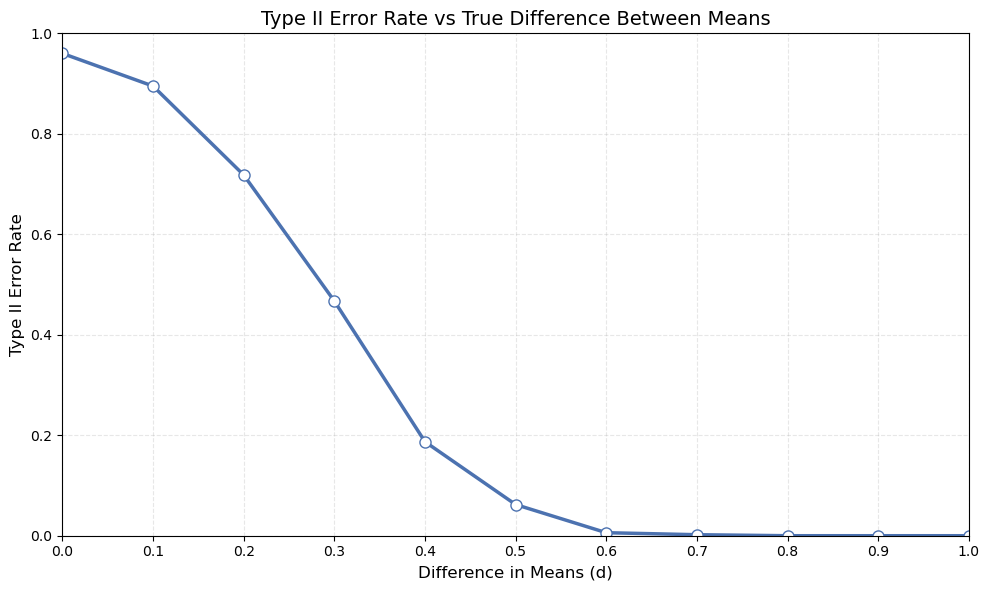

In [70]:
# Plot the Type II error rate against d
plt.figure(figsize=(10, 6))
plt.plot(
    d_values, type2_errors,
    color='#4C72B0',
    marker='o',
    markerfacecolor='white',
    markersize=8,
    linewidth=2.5
)
plt.xlabel('Difference in Means (d)', fontsize=12)
plt.ylabel('Type II Error Rate', fontsize=12)
plt.title('Type II Error Rate vs True Difference Between Means', fontsize=14)
plt.xticks(d_values)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

### Interpretation
The plot shows that the Type II error rate is high when the true difference between groups (d) is small.  
As d increases, the groups become more distinguishable, and the t-test is more likely to reject the null hypothesis.  
This means the Type II error rate decreases as the real difference between means grows, which matches statistical theory.

- [Type I and Type II Errors in Hypothesis Testing (Scribbr)](https://www.scribbr.com/statistics/type-i-and-type-ii-errors/) — explains how larger true differences reduce the chance of a Type II error.
- [Does Increasing Sample Size Reduce Type II Errors? (DeepChecks)](https://www.deepchecks.com/question/does-increasing-sample-size-reduce-type-2-errors/) — explains how larger effects or larger samples reduce the chance of a Type II error


### Conclusion
The results show that Type II errors are common when the true difference between means is small, but they decline steadily as the effect size increases. This demonstrates the direct relationship between effect size and the power of a t-test.

---

## Problem 4: ANOVA

In this problem, we use simulation to explore how one-way ANOVA behaves when comparing three groups with different true means.
We generate three independent samples of size 30 from normal distributions with means 0, 0.5, and 1, all with SD 1.

We then run a one-way ANOVA to test whether the groups come from populations with the same mean.
Because the true means differ, we expect ANOVA to return a large F-statistic and a small p-value, indicating that at least one group mean is different.

This shows how ANOVA detects group differences when multiple population means are not equal.

In [ ]:
# Sample size for each group
n = 30

# Means for the three groups
mean1 = 0.0
mean2 = 0.5
mean3 = 1.0

# standard deviation (same for all groups)
sd = 1.0

In [72]:
# Generate three independent normal distribution samples using the parameters above
group1 = np.random.normal(loc=mean1, scale=sd, size=n)
group2 = np.random.normal(loc=mean2, scale=sd, size=n)
group3 = np.random.normal(loc=mean3, scale=sd, size=n)

print(f"Sample means: group1={group1.mean():.3f}, group2={group2.mean():.3f}, group3={group3.mean():.3f}")

Sample means: group1=-0.002, group2=0.395, group3=0.927


- [numpy.random.normal (NumPy)](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.normal.html) — used to generate N samples from a standard normal distribution. 

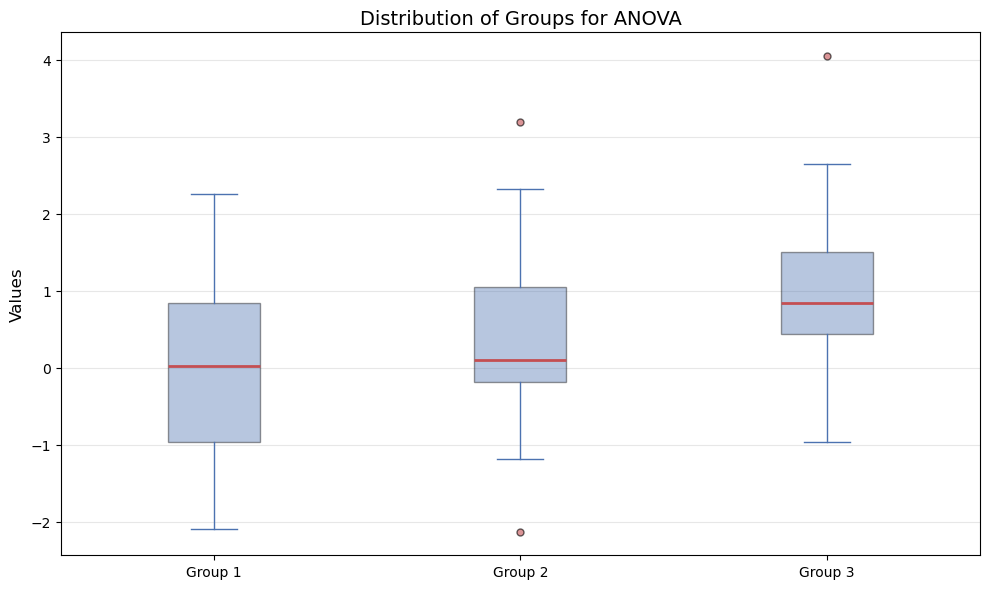

In [73]:
# Create a boxplot to visualise and compare the distributions of the three groups used in the ANOVA
plt.figure(figsize=(10, 6))
plt.boxplot(
    [group1, group2, group3],
    tick_labels=['Group 1', 'Group 2', 'Group 3'],
    patch_artist=True,
    boxprops=dict(facecolor='#4C72B0', alpha=0.4),
    medianprops=dict(color='#C44E52', linewidth=2),
    whiskerprops=dict(color='#4C72B0'),
    capprops=dict(color='#4C72B0'),
    flierprops=dict(marker='o', markersize=5, markerfacecolor='#C44E52', alpha=0.6)
)

plt.ylabel('Values', fontsize=12)
plt.title('Distribution of Groups for ANOVA', fontsize=14)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [74]:
# Run a one-way ANOVA on the three groups
F_stat, p_value = f_oneway(group1, group2, group3)

print(f"ANOVA F-statistic: {F_stat:.3f}, p-value: {p_value:.4g}")

ANOVA F-statistic: 4.985, p-value: 0.008919


- [DataCamp – ANOVA Test](https://www.datacamp.com/tutorial/anova-test) — used to understand the logic and purpose of one-way ANOVA.

- [Statology – One-Way ANOVA in Python](https://www.statology.org/one-way-anova-python/) — used as a reference for implementing the ANOVA in Python using `f_oneway`.

- [SciPy Documentation – scipy.stats.f_oneway](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) — used to understand the Python function that performs the one-way ANOVA and returns the F-statistic and p-value.

- [GeeksforGeeks – One-Way ANOVA in Python](https://www.geeksforgeeks.org/python/how-to-perform-a-one-way-anova-in-python/) — used as a reference for the practical implementation of ANOVA in Python.


### ANOVA Interpretation

One-way ANOVA tests whether all group means are equal:

> H₀: μ₁ = μ₂ = μ₃  
> H₁: At least one mean differs.

The ANOVA returns a large F-statistic and a very small p-value (p < 0.05), providing evidence to reject H₀.  
This matches our setup: the groups were generated with true means 0, 0.5, and 1.0, so we expect ANOVA to detect a difference.


* [DataCamp – *ANOVA Test*](https://www.datacamp.com/tutorial/anova-test) — used to confirm the ANOVA null hypothesis and interpretation of the F-statistic and p-value.
* [Statology – *One-Way ANOVA in Python*](https://www.statology.org/one-way-anova-python/) — used to reference how ANOVA tests equality of group means and when to reject H₀.
* [SciPy Documentation – `scipy.stats.f_oneway`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) — used to verify how Python computes the one-way ANOVA and what hypotheses it tests.
* [GeeksforGeeks – *One-Way ANOVA in Python*](https://www.geeksforgeeks.org/python/how-to-perform-a-one-way-anova-in-python/) — used to support practical understanding of ANOVA results and p-value interpretation.


In [75]:
# Perform pairwise independent two-sample t-tests between the three groups
t_12, p_12 = ttest_ind(group1, group2, equal_var=True)
t_13, p_13 = ttest_ind(group1, group3, equal_var=True)
t_23, p_23 = ttest_ind(group2, group3, equal_var=True)

print(f"Group 1 vs 2: t = {t_12:.3f}, p = {p_12:.4g}")
print(f"Group 1 vs 3: t = {t_13:.3f}, p = {p_13:.4g}")
print(f"Group 2 vs 3: t = {t_23:.3f}, p = {p_23:.4g}")

Group 1 vs 2: t = -1.329, p = 0.1892
Group 1 vs 3: t = -3.103, p = 0.002959
Group 2 vs 3: t = -1.851, p = 0.06928


Here are concise references in the same style as the rest of your notebook:

* [SciPy Documentation – `scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) — used to run independent two-sample t-tests between the groups.
* [Statology – *Two Sample t-Test in Python*](https://www.statology.org/two-sample-t-test-python/) — used to confirm how to compare two groups and interpret t- and p-values.
* [Machine Learning Mastery – *How to Code the Student’s t-Test*](https://www.machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/) — used to understand the mechanics of the t-test when comparing group means.


### Pairwise t-Tests Interpretation

ANOVA tests whether all three group means are equal. In our simulation, the small p-value
(p < 0.05) leads us to reject H₀ and conclude that at least one mean differs.

The pairwise t-tests identify which groups differ:

- **Group 1 vs 2:** t = -1.329, p ≈ 0.189 - not significant at α = 0.05  
- **Group 1 vs 3:** t = -3.103, p ≈ 0.003 - significant  
- **Group 2 vs 3:** t = -1.851, p ≈ 0.069 - not significant at α = 0.05  

Consistent with the true means (0, 0.5, 1.0), the largest difference (Group 1 vs Group 3)
is strongly significant. The medium difference (Group 2 vs Group 3) is borderline with this
sample size, and the smallest difference (Group 1 vs Group 2) is not significant.

Overall, ANOVA shows that not all means are equal, and the t-tests indicate which pairs
are contributing most to that result.


**Why Use ANOVA Instead of Many t-Tests?**

Running multiple t-tests increases the chance of a Type I error because each test adds another opportunity for a false positive. ANOVA avoids this by using one overall test of:

> H₀: all group means are equal.

Only if this test is significant do we examine pairwise comparisons, helping to better control the overall error rate.


* [DataCamp – *ANOVA Test*](https://www.datacamp.com/tutorial/anova-test) — used to confirm that ANOVA tests whether all group means are equal and rejects H₀ when p < 0.05.
* [Statology – *One-Way ANOVA in Python*](https://www.statology.org/one-way-anova-python/) — used to understand how ANOVA identifies that at least one group mean differs.
* [SciPy Documentation – `scipy.stats.ttest_ind`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) — used to perform the pairwise t-tests that identify which means differ.
* [statisticshowto – *T Test (Student’s T-Test): Definition and Examples*](https://www.statisticshowto.com/probability-and-statistics/t-test/) — used for interpreting pairwise t-test outputs (t-statistic and p-value).
* [Statology – *Two Sample t-Test in Python*](https://www.statology.org/two-sample-t-test-python/) — used to support the comparison of group means using pairwise t-tests.
* [Statistics How To – *ANOVA: Definition & Examples*](https://www.statisticshowto.com/probability-and-statistics/anova/) — describes how ANOVA compares multiple group means in one test to avoid repeated-testing errors.


### Conclusion
ANOVA provides the overall evidence of unequal group means, while the pairwise t-tests reveal which specific differences drive that result.

----

## Overall Conclusion

Across these four problems, simulation and analytical methods give consistent results and help illustrate key ideas in applied statistics. 

In Problem 1, Monte Carlo estimates closely match the exact probabilities in the Lady Tasting Tea experiment, highlighting how unlikely a perfect random guess is.

In Problem 2, repeated sampling from a normal distribution shows that the sample standard deviation (ddof = 1) corrects the small-sample bias of the population formula, and that both estimates converge to the true standard deviation as the sample size increases.

Problem 3 uses simulation to demonstrate that Type II error rates are high when the true difference between means is small and decrease as the effect size increases.

Problem 4 shows how ANOVA detects differences across three group means using a single overall test, with pairwise t-tests revealing which groups differ and ANOVA helping to control the risk of Type I error when comparing multiple groups.

---

---